In [1]:
import nltk
import string
import re
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Gerekli NLTK verilerini indir
nltk.download('punkt')
nltk.download('stopwords')

# Dosya yolu
file_path = "C:\\Users\\Milarda\\OneDrive\\Masaüstü\\oyunveri\\cevrilmis_metin.txt"

# 1. Metni oku
with open(file_path, "r", encoding="utf-8") as f:
    text = f.read()

# 2. Küçük harf
text = text.lower()

# 3. Sayı ve özel karakter temizliği
text = re.sub(r'[^a-z\s]', '', text)

# 4. Tokenize et
tokens = word_tokenize(text)

# 5. Stopwords çıkar
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_words]

# 6. Stemming
stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(word) for word in tokens]

# 7. DataFrame'e çevir
df = pd.DataFrame(stemmed_tokens, columns=["stemmed_word"])

# 8. CSV olarak kaydet
df.to_csv("stemmed.csv", index=False, encoding="utf-8")

print("✅ Stem yapılmış veri 'stemmed.csv' olarak kaydedildi.")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Milarda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Milarda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


✅ Stem yapılmış veri 'stemmed.csv' olarak kaydedildi.


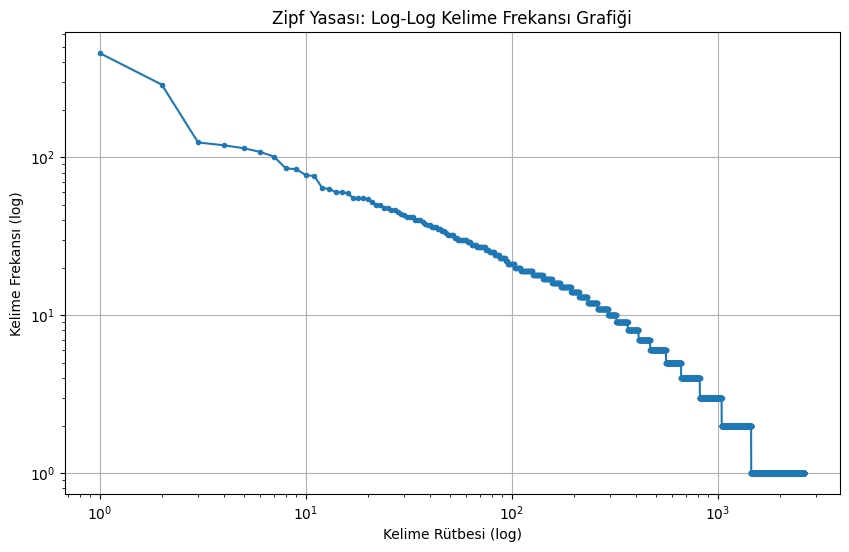

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# 1. CSV'den veriyi oku
file_path = "C:\\Users\\Milarda\\stemmed.csv"
df = pd.read_csv(file_path)

# 2. Stemmed kelime listesini al
kelimeler = df["stemmed_word"].astype(str).tolist()

# 3. Kelime sıklığı sayımı
kelime_sayacı = Counter(kelimeler)

# 4. Sıklıkları sırala
sıklıklar = sorted(kelime_sayacı.values(), reverse=True)
rütbeler = range(1, len(sıklıklar) + 1)

# 5. Log-log grafiği çiz
plt.figure(figsize=(10, 6))
plt.loglog(rütbeler, sıklıklar, marker=".")
plt.title("Zipf Yasası: Log-Log Kelime Frekansı Grafiği")
plt.xlabel("Kelime Rütbesi (log)")
plt.ylabel("Kelime Frekansı (log)")
plt.grid(True)
plt.show()


In [2]:
import pandas as pd
import string

def kelime_sayisi(metin):
    # Noktalama işaretlerini çıkar
    metin = metin.translate(str.maketrans("", "", string.punctuation))
    
    # Küçük harfe çevir ve boşluklara göre ayır
    kelimeler = metin.lower().split()
    return len(kelimeler)

# CSV dosyasını oku
file_path = "C:\\Users\\Milarda\\stemmed.csv"
df = pd.read_csv(file_path)

# "lemmatized_word" sütunundaki kelimeleri birleştir
metin = " ".join(df["stemmed_word"].astype(str).tolist())

# Kelime sayısını hesapla
print("Kelime sayısı:", kelime_sayisi(metin))


Kelime sayısı: 13304


In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

# Gerekli NLTK kaynaklarını indir
nltk.download('punkt')
nltk.download('stopwords')

# Lemmatize edilmiş kelimeleri oku
file_path = "C:\\Users\\Milarda\\stemmed.csv"
df = pd.read_csv(file_path)

# Kelimeleri bir cümle olarak birleştir (TF-IDF cümle bazlı çalışır)
metin = " ".join(df["stemmed_word"].astype(str).tolist())
metinler = [metin]  # Tek bir metin olarak listeye al

# Stop words listesi
stop_words = set(stopwords.words('english'))

# Metni temizle (tokenizasyon + stop word çıkarımı + noktalama temizliği)
metinler_temiz = []
for m in metinler:
    kelimeler = word_tokenize(m.lower())
    temiz_kelime = [kelime for kelime in kelimeler if kelime not in stop_words and kelime.isalpha()]
    metinler_temiz.append(" ".join(temiz_kelime))

# TF-IDF vektörizer
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(metinler_temiz)

# DataFrame'e dönüştür
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# CSV'ye yaz
tfidf_df.to_csv("onemstem.csv", index=False, encoding="utf-8")

print("✅ Dosya başarıyla oluşturuldu: onemstem.csv")


✅ Dosya başarıyla oluşturuldu: onemstem.csv


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Milarda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Milarda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
import gensim
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import pandas as pd

# NLTK veri setlerini indir
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Stemmed kelimeleri oku
file_path = "C:\\Users\\Milarda\\stemmed.csv"
df = pd.read_csv(file_path)

# Kelimeleri yeniden cümlelere böl
# Örneğin: her 10 kelime = 1 cümle
kelimeler = df["stemmed_word"].tolist()
sentence_length = 10
sentences = [" ".join(kelimeler[i:i+sentence_length]) for i in range(0, len(kelimeler), sentence_length)]

# Stopwords listesini al
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Cümleleri stemleyip tokenize eden fonksiyon
def preprocess_sentence(sentence):
    tokens = word_tokenize(sentence)
    filtered_tokens = [token.lower() for token in tokens if token.isalpha() and token.lower() not in stop_words]
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
    return stemmed_tokens

# Tüm corpus'u hazırla
tokenized_corpus_stemmed = [preprocess_sentence(sentence) for sentence in sentences]

# Model konfigürasyonları
parameters = [
    {'model_type': 'cbow', 'window': 2, 'vector_size': 100},
    {'model_type': 'skipgram', 'window': 2, 'vector_size': 100},
    {'model_type': 'cbow', 'window': 4, 'vector_size': 100},
    {'model_type': 'skipgram', 'window': 4, 'vector_size': 100},
    {'model_type': 'cbow', 'window': 2, 'vector_size': 300},
    {'model_type': 'skipgram', 'window': 2, 'vector_size': 300},
    {'model_type': 'cbow', 'window': 4, 'vector_size': 300},
    {'model_type': 'skipgram', 'window': 4, 'vector_size': 300}
]

# Model eğitimi ve kaydı
def train_and_save_model(corpus, params, model_name):
    model = Word2Vec(corpus, vector_size=params['vector_size'], window=params['window'], min_count=1, sg=1 if params['model_type'] == 'skipgram' else 0)
    model.save(f"{model_name}_{params['model_type']}_window{params['window']}_dim{params['vector_size']}.model")
    print(f"✅ {model_name}_{params['model_type']}_window{params['window']}_dim{params['vector_size']}.model saved!")

# Stemmed modelleri eğit
for param in parameters:
    train_and_save_model(tokenized_corpus_stemmed, param, "stemmed_model")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Milarda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Milarda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Milarda\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


✅ stemmed_model_cbow_window2_dim100.model saved!
✅ stemmed_model_skipgram_window2_dim100.model saved!
✅ stemmed_model_cbow_window4_dim100.model saved!
✅ stemmed_model_skipgram_window4_dim100.model saved!
✅ stemmed_model_cbow_window2_dim300.model saved!
✅ stemmed_model_skipgram_window2_dim300.model saved!
✅ stemmed_model_cbow_window4_dim300.model saved!
✅ stemmed_model_skipgram_window4_dim300.model saved!


In [6]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
import os

# === 1. Dosya yolları ===
model_path = "C:\\Users\\Milarda\\stemmed_model_skipgram_window4_dim300.model"
csv_path = "C:\\Users\\Milarda\\Downloads\\lemmatized_sentences.csv"
output_path = "w2v_top5_skipgram.csv"

# === 2. Modeli yükle ===
if not os.path.exists(model_path):
    raise FileNotFoundError(f"Model bulunamadı: {model_path}")
model = Word2Vec.load(model_path)

# === 3. Cümleleri oku ===
df = pd.read_csv(csv_path)
if "sentence" not in df.columns:
    raise ValueError("CSV dosyasında 'sentence' adında bir sütun bulunamadı.")
sentences = df["sentence"].fillna("").tolist()

# === 4. Ortalama vektör hesaplama fonksiyonu ===
def ortalama_vektor(cumle, model):
    kelimeler = cumle.split()
    vektorler = [model.wv[k] for k in kelimeler if k in model.wv]
    return np.mean(vektorler, axis=0) if vektorler else np.zeros(model.vector_size)

# === 5. Tüm cümleler için vektörleri hesapla ===
vektorler = np.array([ortalama_vektor(c, model) for c in sentences])

# === 6. Giriş cümlesi (örnek: 14. satır) ===
girilen_index = 14
if girilen_index >= len(vektorler):
    raise IndexError(f"Girilen index {girilen_index}, toplam {len(vektorler)} cümle var.")
girilen_vektor = vektorler[girilen_index].reshape(1, -1)

# === 7. Benzerlik skoru hesapla ===
skorlar = cosine_similarity(girilen_vektor, vektorler)[0]
skorlar[girilen_index] = -1  # kendini dışla

# === 8. İlk 5 benzer cümleyi bul ===
ilk_5_index = np.argsort(skorlar)[-5:][::-1]
ilk_5_skorlar = skorlar[ilk_5_index]

# === 9. Sonuçları kaydet ===
sonuc_df = pd.DataFrame({
    "model": ["skipgram_win4_dim300_stemmed"] * 5,
    "index": ilk_5_index,
    "cosine_score": ilk_5_skorlar
})
sonuc_df.to_csv(output_path, index=False, encoding="utf-8")

print(f"✅ Word2Vec top 5 benzerlik sonucu kaydedildi: {output_path}")


✅ Word2Vec top 5 benzerlik sonucu kaydedildi: w2v_top5_skipgram.csv


In [8]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity

# Stemmed model bilgileri
model_configurations = [
    {"prefix": "stemmed_model", "type": "cbow", "window": 2, "dim": 100},
    {"prefix": "stemmed_model", "type": "skipgram", "window": 2, "dim": 100},
    {"prefix": "stemmed_model", "type": "cbow", "window": 4, "dim": 100},
    {"prefix": "stemmed_model", "type": "skipgram", "window": 4, "dim": 100},
    {"prefix": "stemmed_model", "type": "cbow", "window": 2, "dim": 300},
    {"prefix": "stemmed_model", "type": "skipgram", "window": 2, "dim": 300},
    {"prefix": "stemmed_model", "type": "cbow", "window": 4, "dim": 300},
    {"prefix": "stemmed_model", "type": "skipgram", "window": 4, "dim": 300}
]

# Ortak fonksiyon
def ortalama_vektor(cumle, model):
    kelimeler = cumle.split()
    vektorler = [model.wv[k] for k in kelimeler if k in model.wv]
    if not vektorler:
        return np.zeros(model.vector_size)
    return np.mean(vektorler, axis=0)

def top5_benzerlik(model_path, csv_path, model_label, output_csv, girilen_index=14):
    model = Word2Vec.load(model_path)
    df = pd.read_csv(csv_path)
    sentences = df["sentence"].tolist()
    vektorler = np.array([ortalama_vektor(c, model) for c in sentences])
    girilen_vektor = vektorler[girilen_index].reshape(1, -1)
    skorlar = cosine_similarity(girilen_vektor, vektorler)[0]
    skorlar[girilen_index] = -1
    ilk_5_index = np.argsort(skorlar)[-5:][::-1]
    ilk_5_skorlar = skorlar[ilk_5_index]
    sonuc_df = pd.DataFrame({
        "model": [model_label] * 5,
        "index": ilk_5_index,
        "cosine_score": ilk_5_skorlar
    })
    sonuc_df.to_csv(output_csv, index=False, encoding="utf-8")
    print(f"✅ {model_label} sonucu {output_csv} dosyasına yazıldı.")

# Tüm stemmed modelleri sırayla çalıştır
for config in model_configurations:
    prefix = config["prefix"]
    model_type = config["type"]
    window = config["window"]
    dim = config["dim"]
    
    model_filename = f"{prefix}_{model_type}_window{window}_dim{dim}.model"
    model_path = f"C:\\Users\\Milarda\\{model_filename}"
    
    # Stemmed için doğru CSV dosyasını seç
    csv_path = "C:\\Users\\Milarda\\Downloads\\stemmed_sentences.csv"
    
    label = f"{model_type}_win{window}_dim{dim}_stemmed"
    output_csv = f"top5_{label}.csv"
    
    top5_benzerlik(model_path, csv_path, label, output_csv)


✅ cbow_win2_dim100_stemmed sonucu top5_cbow_win2_dim100_stemmed.csv dosyasına yazıldı.
✅ skipgram_win2_dim100_stemmed sonucu top5_skipgram_win2_dim100_stemmed.csv dosyasına yazıldı.
✅ cbow_win4_dim100_stemmed sonucu top5_cbow_win4_dim100_stemmed.csv dosyasına yazıldı.
✅ skipgram_win4_dim100_stemmed sonucu top5_skipgram_win4_dim100_stemmed.csv dosyasına yazıldı.
✅ cbow_win2_dim300_stemmed sonucu top5_cbow_win2_dim300_stemmed.csv dosyasına yazıldı.
✅ skipgram_win2_dim300_stemmed sonucu top5_skipgram_win2_dim300_stemmed.csv dosyasına yazıldı.
✅ cbow_win4_dim300_stemmed sonucu top5_cbow_win4_dim300_stemmed.csv dosyasına yazıldı.
✅ skipgram_win4_dim300_stemmed sonucu top5_skipgram_win4_dim300_stemmed.csv dosyasına yazıldı.


In [9]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import Word2Vec

# ------------------------------
# 1. Dosya Yolu ve Örnek Cümle
# ------------------------------
csv_path = "C:\\Users\Milarda\\Downloads\\stemmed_sentences.csv"  # veya "stemmed_sentences.csv"
model_path = "lemmatized_model_skipgram_window4_dim300.model"  # Modeline göre değiştir

# Örnek cümle indexi
ornek_index = 25

# ------------------------------
# 2. Cümleleri Yükle
# ------------------------------
df = pd.read_csv(csv_path)
metinler = df["sentence"].tolist()
ornek_cumle = metinler[ornek_index]
print(f"\n🎯 Örnek Cümle [{ornek_index}]:\n{ornek_cumle}\n")

# ------------------------------
# 3. TF-IDF ile Benzerlik
# ------------------------------
print("🔍 TF-IDF Benzerlik Sonuçları:")
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(metinler)
ornek_vec = tfidf_matrix[ornek_index]

# Benzerlikleri hesapla
tfidf_scores = cosine_similarity(ornek_vec, tfidf_matrix)[0]
tfidf_scores[ornek_index] = -1  # Kendini hariç tut

# En benzer 5 cümleyi bul
top5_tfidf_idx = tfidf_scores.argsort()[-5:][::-1]
for i in top5_tfidf_idx:
    print(f"• {df.iloc[i]['sentence']} (score: {tfidf_scores[i]:.4f})")

# ------------------------------
# 4. Word2Vec ile Benzerlik
# ------------------------------
print("\n🤖 Word2Vec Benzerlik Sonuçları:")
model = Word2Vec.load(model_path)

def ortalama_vektor(cumle, model):
    kelimeler = cumle.split()
    vektorler = [model.wv[w] for w in kelimeler if w in model.wv]
    if not vektorler:
        return np.zeros(model.vector_size)
    return np.mean(vektorler, axis=0)

# Tüm cümleleri vektörle
w2v_vektorler = np.array([ortalama_vektor(c, model) for c in metinler])
ornek_vec_w2v = w2v_vektorler[ornek_index].reshape(1, -1)

# Benzerlikleri hesapla
w2v_scores = cosine_similarity(ornek_vec_w2v, w2v_vektorler)[0]
w2v_scores[ornek_index] = -1

# En benzer 5 cümleyi bul
top5_w2v_idx = w2v_scores.argsort()[-5:][::-1]
for i in top5_w2v_idx:
    print(f"• {df.iloc[i]['sentence']} (score: {w2v_scores[i]:.4f})")



🎯 Örnek Cümle [25]:
red dead redempt open world actionsequ game develop rockstar game

🔍 TF-IDF Benzerlik Sonuçları:
• result red dead redempt cowboy game epic stori describ human (score: 0.4183)
• point view red dead redempt offer action game full cowboy (score: 0.4157)
• result red dead redempt groundbreak product accord visual sens attract (score: 0.3701)
• v openworld actionmast game develop rockstar game releas gta v (score: 0.2998)
• dead redempt qualiti stori emot transform arthur morgan relationship gang (score: 0.2372)

🤖 Word2Vec Benzerlik Sonuçları:
• game uniqu twist genr (score: 0.0000)
• moral choic made use power player decis affect stori shape (score: 0.0000)
• fascin atmospher world witchcraft insid hogwart castl class librari portrait (score: 0.0000)
• hidden passag fan one one compat detail read book film (score: 0.0000)
• music make familiar spirit harri potter univers aliv result hogwart (score: 0.0000)
